In [5]:
import pandas as pd
import numpy as np
import matplotlib


In [3]:
class MomVectorBacktester(object):
    def __init__(self,symbol,start,end,amount,tc):
        self.symbol = symbol
        self.start = start
        self.end = end 
        self.amount = amount
        self.tc = tc
        self.result = None
        self.get_data()

    def get_data(self):
        raw = pd.read_csv('COINBASE_BTCUSD, 1D.csv',
                          index_col=0, parse_dates=True).dropna()
        raw = pd.DataFrame(raw[self.symbol])
        raw = raw.loc[self.start:self.end]
        raw.rename(columns={self.symbol:'price'}, inplace = True)
        raw['return'] = np.log(raw / raw.shift(1))
        self.data = raw

    def run_strategy(self, momentum = 1):
        self.momentum = momentum
        data = self.data.copy().dropna()
        data['position'] = np.sign(data['return'].rolling(momentum).mean())
        data['strategy'] = data['position'].shift(1) * data['return']
        #determine when a trade place
        data.dropna(inplace=True)
        trades = data['position'].diff().fillna(0) !=0
        #subtract transaction cost from return when trade takes place
        data['strategy'][trades] -= self.tc
        data['creturns'] = self.amount * data['return'].cumsum().apply(np.exp)
        data['cstrategy'] = self.amount * \
            data['strategy'].cumsum().apply(np.exp)
        self.results = data
        #absolute performance of the strategy 
        aperf = self.results['cstrategy'].iloc[-1]
        #out -/ underperformance of the run_strategy
        operf = aperf - self.results['creturns'].iloc[-1]
        return round(aperf,2),round(operf,2)

    def plot_results(self):
        if self.results is None:
            print('No results to plot yet. Run a strategy.')
        title = '%s | TC = %.4f'%(self.symbol, self.tc)
        self.results[['creturns','cstrategy']].plot(title=title,figsize=(20,12))

In [4]:
if __name__ == '__main__':
    mombt = MomVectorBacktester('close','2010-1-1','2020-12-31',10000,0.0)
    print(mombt.run_strategy())
    print(mombt.run_strategy(momentum=3))
    mombt = MomVectorBacktester('close','2010-1-1','2020-12-31',10000,0.0)
    print(mombt.run_strategy(momentum=3))

FileNotFoundError: ignored

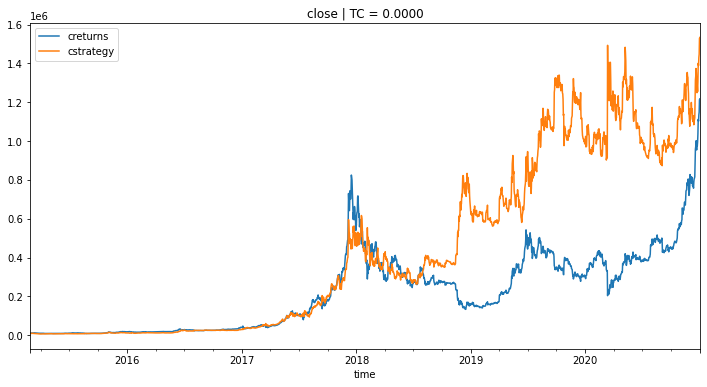

In [30]:
mombt.plot_results()